In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv("C:/Users/shashi/Downloads/winemag-data_first150k.csv.zip")

# Display basic information about the dataset
print(data.head())
print(data.info())

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data preprocessing
data = data.dropna(subset=['points'])  # Remove rows with missing Points

# Select relevant features and target
X = data.drop("points", axis=1)
y = data["points"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['country', 'province', 'variety']
numerical_features = ['price']


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create pipelines for preprocessing
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_pipeline = Pipeline([('impute', SimpleImputer(strategy='mean'))]) # Impute missing values with mean

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_pipeline, categorical_features),
        ('num', numerical_pipeline, numerical_features)])


In [22]:
# Initialize the Linear Regression model
model = LinearRegression()

# Create the final pipeline
pipeline = Pipeline([('preprocessor', preprocessor),('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 7.249276387909737
Mean Absolute Error: 2.138469666435673


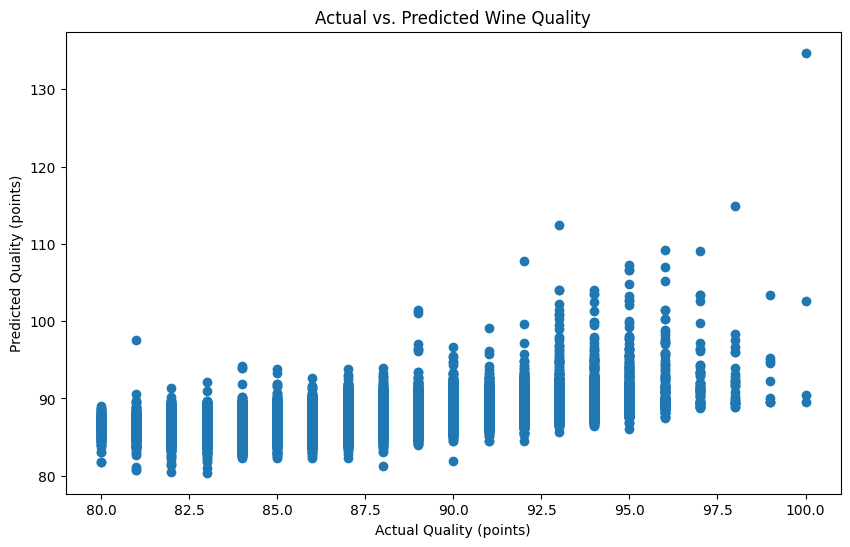

In [23]:
# Visualize predicted vs. actual quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality (points)")
plt.ylabel("Predicted Quality (points)")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()

In [25]:
print("First in-sample predictions:", pipeline.predict(X_train.head()))
print("Actual target values for those homes:", y_train.head().tolist())


First in-sample predictions: [86.64973881 87.47737049 87.65972819 87.4619226  87.66650015]
Actual target values for those homes: [83, 87, 89, 92, 89]
